#### Import Libraries

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

#### Load Data

In [3]:
def loaddata(file, delimeter):
    data = np.loadtxt(file,delimiter=delimeter)
    print ('Dimensions:',data.shape)
    print(data[1:6,:])
    return(data)

In [4]:
data = loaddata('ex2data1.txt',',')

Dimensions: (100, 3)
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [5]:
X=np.c_[np.ones((data.shape[0],1)),data[:,0:2]]
y=np.c_[data[:,2]]
print (X.shape, y.shape)
X[0:5,:]

(100, 3) (100, 1)


array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803],
       [  1.        ,  60.18259939,  86.3085521 ],
       [  1.        ,  79.03273605,  75.34437644]])

#### Plot Data

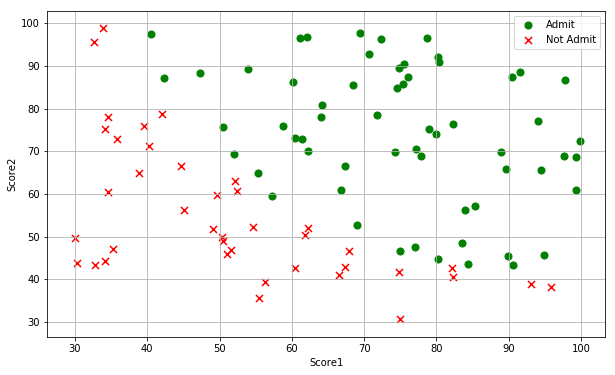

In [111]:
#visualizing the data
positive = np.array(data[:,2]==1)
negative = data[:,2]==0

def myPlot():
    plt.subplots(figsize=[10,6])
    plt.scatter(data[positive][:,0], data[positive][:,1], s= 50, c='g', marker ='o', label='Admit')
    plt.scatter(data[negative][:,0], data[negative][:,1], s= 50, c='r', marker ='x', label='Not Admit')
    plt.xlabel('Score1')
    plt.ylabel('Score2')
    plt.legend()
    plt.grid(True) 
myPlot()
plt.show()

In [7]:
#defining the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

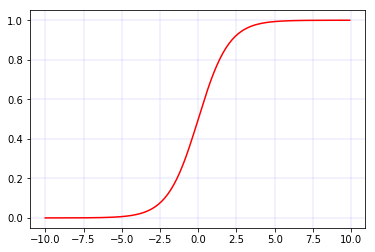

In [8]:
#plotting sigmoid function curve
nums = np.arange(-10,10,0.1)
plt.plot(nums, sigmoid(nums), 'r')
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.show()

In [9]:
# defining cost function
def costfunction(theta,X,y):
    m = y.size
    h= sigmoid(X.dot(theta))
    J = -1*(1./m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [10]:
#defining gradient function
def gradient(theta,X,y):
    m=y.size
    h=sigmoid(X.dot(theta.reshape(-1,1)))
    grad = (1./m)*X.T.dot(h-y)
    return(grad.flatten())

In [11]:
int_theta=np.zeros(X.shape[1])
cost = costfunction(int_theta,X,y)
grad = gradient(int_theta,X,y)
print('Cost= ', cost)
print('Grad= ', grad)

Cost=  0.69314718056
Grad=  [ -0.1        -12.00921659 -11.26284221]


In [19]:
#Optimize cost function
res = minimize(costfunction,int_theta,args=(X,y),method=None,jac=gradient,options={'maxiter':400})
print(res)

      fun: 0.2034977015895099
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557620e-09,   4.36433485e-07,  -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])


/home/nbuser/anaconda3_431/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/home/nbuser/anaconda3_431/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


In [103]:
theta_updated = res.x
theta_updated[0]

-25.161316336346879

In [30]:
#prediction function
def pred(theta, X):
    return sigmoid(np.dot(X, theta))

In [120]:
pred(theta_updated,np.array([1,45,85]) )

0.77629032493310213

In [121]:
#defining prediction threshold
def predictions(theta, X):
    return pred(theta, X) > 0.5

In [122]:
#accuracy calculation
predicted = np.matrix(predictions(theta_updated, X).astype(int)).T
final = (y - predicted ==0).sum()
total = len(y)
accuracy = float(final/total)*100
print('accuracy of the model is {}%'.format(accuracy))


accuracy of the model is 89.0%


In [125]:
#making decision boundry
boundary_x = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_y = (-1./theta_updated[2])*(theta_updated[0] + theta_updated[1]*boundary_x)

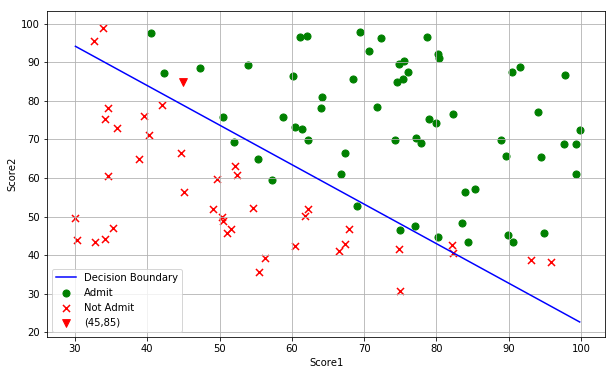

In [126]:
#making the plot
myPlot()
plt.scatter(45,85,c='r',marker='v',s=60,label='(45,85)')
plt.plot(boundary_x, boundary_y, c='b', label='Decision Boundary')
plt.legend()
plt.show()